In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/autompg-dataset/auto-mpg.csv


#### Using solution_1 as base reference and build on it

In [113]:
raw_data = pd.read_csv("/kaggle/input/autompg-dataset/auto-mpg.csv", na_values='?')
raw_data.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [114]:
raw_data.shape

(398, 9)

In [115]:
raw_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [116]:
raw_data.describe()
describe = raw_data.describe()
describe
# describe['horsepower']
raw_data.iloc[0]['horsepower']

130.0

In [117]:
raw_data.isnull().any()
# No missing values in columns

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

## Data Exploration and Engineering

### 1. Missing values

In [118]:
raw_data.isnull().any()
raw_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [119]:
# Description in data says attribute "Horsepower" has missing values, hence, inspecting.
# 7 records found with '?' value - to be treated as missing value
# Solved this by reading the csv with 'na_values' argument

raw_data.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [120]:
# Imputing missing value
# 'Horsepower' - Continuous values

raw_data['horsepower'] = raw_data['horsepower'].fillna(raw_data['horsepower'].mean())
raw_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### 2. Handling Outliers

<AxesSubplot:xlabel='origin'>

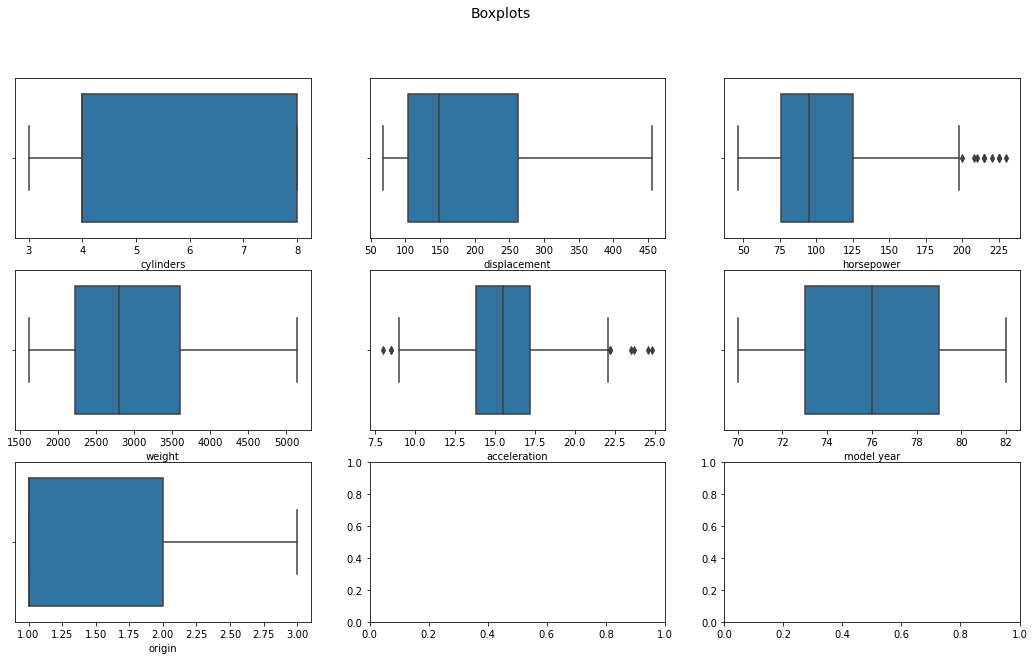

In [121]:
# Finding outliers - Plotting box plots

fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Boxplots', size = 14)

sns.boxplot(ax=axes[0, 0], data=raw_data, x='cylinders')
sns.boxplot(ax=axes[0, 1], data=raw_data, x='displacement')
sns.boxplot(ax=axes[0, 2], data=raw_data, x='horsepower')
sns.boxplot(ax=axes[1, 0], data=raw_data, x='weight')
sns.boxplot(ax=axes[1, 1], data=raw_data, x='acceleration')
sns.boxplot(ax=axes[1, 2], data=raw_data, x='model year')
sns.boxplot(ax=axes[2, 0], data=raw_data, x='origin')

In [122]:
raw_data_stats = raw_data.describe()
raw_data_stats

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [123]:
acc_stats = raw_data_stats['acceleration']
acc_stats

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

In [124]:
# Attributes with outliers - 'acceleration', 'horsepower'
# Using Inter-Quartile Range to drop outlier records

# First and Third quartile
acc_q1 = acc_stats[4]
acc_q3 = acc_stats[6]

# Inter-quartile Range
acc_iqr = acc_q3 - acc_q1

# Outlier limits
acc_low_limit = acc_q1 - (acc_iqr * 1.5)
acc_high_limit = acc_q3 + (acc_iqr * 1.5)

print(acc_q1, acc_q3, acc_iqr, acc_low_limit, acc_high_limit)

acc_low_check = raw_data['acceleration'] > acc_low_limit
print(acc_low_check)

acc_high_check = raw_data['acceleration'] < acc_high_limit
print(acc_high_check)

# Checking False flag value
print('Value with flag False: ', raw_data.iloc[394]['acceleration'])

13.825000000000001 17.174999999999997 3.349999999999996 7.125000000000009 23.87499999999999
0      True
1      True
2      True
3      True
4      True
       ... 
393    True
394    True
395    True
396    True
397    True
Name: acceleration, Length: 398, dtype: bool
0       True
1       True
2       True
3       True
4       True
       ...  
393     True
394    False
395     True
396     True
397     True
Name: acceleration, Length: 398, dtype: bool
Value with flag False:  24.6


In [125]:
acc_overall_check = acc_low_check & acc_high_check
raw_data = raw_data[acc_overall_check]
raw_data.shape

# Dropped 9 records

(396, 9)

In [126]:
hpower_stats = raw_data.describe()['horsepower']
hpower_stats

count    396.000000
mean     104.686405
std       38.166913
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

In [127]:
# Addressing outliers in 'horsepower' attribute
# First and Third quartile
hpower_q1 = hpower_stats[4]
hpower_q3 = hpower_stats[6]

# Inter-quartile Range
hpower_iqr = hpower_q3 - hpower_q1

# Outlier limits
hpower_low_limit = hpower_q1 - (hpower_iqr * 1.5)
hpower_high_limit = hpower_q3 + (hpower_iqr * 1.5)

print(hpower_q1, hpower_q3, hpower_iqr, hpower_low_limit, hpower_high_limit)

hpower_low_check = raw_data['horsepower'] > hpower_low_limit
print(hpower_low_check)

hpower_high_check = raw_data['horsepower'] < hpower_high_limit
print(hpower_high_check)

76.0 125.0 49.0 -22.0 223.0
0      True
1      True
2      True
3      True
4      True
       ... 
392    True
393    True
395    True
396    True
397    True
Name: horsepower, Length: 396, dtype: bool
0      True
1      True
2      True
3      True
4      True
       ... 
392    True
393    True
395    True
396    True
397    True
Name: horsepower, Length: 396, dtype: bool


In [128]:
hpower_overall_check = hpower_low_check & hpower_high_check
raw_data = raw_data[hpower_overall_check]
raw_data.shape

# 10 records dropped

(392, 9)

### Continous and Categorical values

In [129]:
# Exploring attribute types and their significance
raw_data.displacement.unique() # Continuous
raw_data.horsepower.unique() # Continuous
raw_data.weight.unique() # Continous but can be put into buckets and treated as categorical
raw_data.acceleration.unique() # Continous but can be put into buckets and treated as categorical

raw_data.cylinders.unique() # Multi-valued discrete - Treating as Categorical
raw_data['model year'].unique() # Categorical
raw_data.origin.unique() # Categorical

raw_data['car name'].unique() # Unique, can be excluded from training and prediction. First word of the name (Manufacturer) can be used.
raw_data.mpg.unique() # Target attribute - Continuous - First guess will be regression algorithms

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. ])

In [130]:
raw_data['origin'].unique()

array([1, 3, 2])

In [131]:
raw_data['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [132]:
raw_data['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [133]:
raw_data['origin'] = raw_data['origin'].astype(str)
raw_data['cylinders'] = raw_data['cylinders'].astype(str)

In [134]:
# Handing Categorical values - 'cylinders', 'origin'. Leaving out 'model year'.

# All the attributes have numerical values, so Label encoding is not required here
# Using One Hot encoding/get_dummies
raw_data = pd.get_dummies(raw_data, columns=['cylinders', 'origin'], prefix=['cylinders', 'origin'])

In [135]:
raw_data.head(20)

,mpg,displacement,horsepower,weight,acceleration,model year,car name,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693,11.5,70,buick skylark 320,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436,11.0,70,plymouth satellite,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433,12.0,70,amc rebel sst,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449,10.5,70,ford torino,0,0,0,0,1,1,0,0
5,15.0,429.0,198.0,4341,10.0,70,ford galaxie 500,0,0,0,0,1,1,0,0
6,14.0,454.0,220.0,4354,9.0,70,chevrolet impala,0,0,0,0,1,1,0,0
7,14.0,440.0,215.0,4312,8.5,70,plymouth fury iii,0,0,0,0,1,1,0,0
9,15.0,390.0,190.0,3850,8.5,70,amc ambassador dpl,0,0,0,0,1,1,0,0
10,15.0,383.0,170.0,3563,10.0,70,dodge challenger se,0,0,0,0,1,1,0,0


In [136]:
# Dropping attribute 'car name'
del raw_data['car name']
raw_data.head(20)

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130.0,3504,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165.0,3693,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150.0,3436,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150.0,3433,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140.0,3449,10.5,70,0,0,0,0,1,1,0,0
5,15.0,429.0,198.0,4341,10.0,70,0,0,0,0,1,1,0,0
6,14.0,454.0,220.0,4354,9.0,70,0,0,0,0,1,1,0,0
7,14.0,440.0,215.0,4312,8.5,70,0,0,0,0,1,1,0,0
9,15.0,390.0,190.0,3850,8.5,70,0,0,0,0,1,1,0,0
10,15.0,383.0,170.0,3563,10.0,70,0,0,0,0,1,1,0,0


## Modeling

### Dependent/Independent variables

In [137]:
# Divide Dependent and Independent variables
X = raw_data.iloc[:, 1:]
y = raw_data.iloc[:, 0]

In [142]:
# Divide Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

### Standardization/Normalization

In [143]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model

In [144]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred_lr)
print("MSE_LinearRegression: ", lr_mse)

MSE_LinearRegression:  13.991042932451904
